## Sequence Classifier for IMDB data
We will build a classifier for the imdb review data. It will use a recurrent neural network with an LSTM layer. We first import all the necessary libraries for the project.

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


The Keras library contains the imdb data set. We keep only the top 25000 used words.

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 25000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 1s 0us/step


Let's see what data we should keep. We build a histogram for review length.

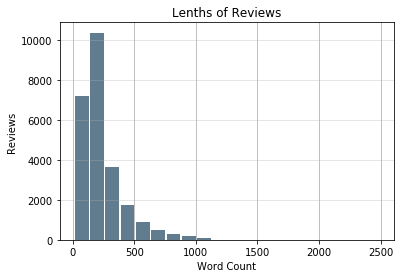

In [3]:
lengths=[]
for i in range(len(X_train)):
    lengths.append(len(X_train[i]))

lengths = pd.Series(lengths)

lengths.plot.hist(grid=True, bins=20, rwidth=.9,
                   color='#607c8e')
plt.title('Lenths of Reviews')
plt.xlabel('Word Count')
plt.ylabel('Reviews')
plt.grid(axis='y', alpha=.4)

We choose a review length of 500 since an overwhelming majority haver less than 500. We truncate the longer reveiws, and pad the shorter reviews. 

In [0]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

Our model has a few layers. 1) We embedd the words into a 50-dimensional space. 2) An LSTM layer with 100 neurons 3) a dense layer to the output neurons.

In [5]:
# create the model
embedding_vecor_length = 50
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           1250000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,310,501
Trainable params: 1,310,501
Non-trainable params: 0
_________________________________________________________________
None

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 328s 13ms/step - loss: 0.4304 - acc: 0.7944 - val_loss: 0.6045 - val_acc: 0.6511
Epoch 2/3
25000/25000 [==============================] - 331s 13ms/step - loss: 0

In [6]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.84%
